In [ ]:
import numpy as np
import random as rd
import autograd.numpy as np
from matplotlib.pyplot import ion, draw, Rectangle, Line2D
import matplotlib.pyplot as plt
import matplotlib.tri as mtri 
from CartPole import *
import random

# Task 1.2

### Scan of Single Variables

[[ 3.46567587  1.          3.14159265  3.        ]
 [ 9.87946087  1.          3.14159265  3.        ]
 [-2.50554854  1.          3.14159265  3.        ]
 ...
 [ 5.00658782  1.          3.14159265  3.        ]
 [ 5.20931646  1.          3.14159265  3.        ]
 [ 9.02547218  1.          3.14159265  3.        ]]
[[ 3.642268    0.70500002 -2.71559052  0.70897245]
 [10.056053    0.70500002 -2.71559052  0.70897245]
 [-2.32895641  0.70500002 -2.71559052  0.70897245]
 ...
 [ 5.18317995  0.70500002 -2.71559052  0.70897245]
 [ 5.38590858  0.70500002 -2.71559052  0.70897245]
 [ 9.20206431  0.70500002 -2.71559052  0.70897245]]


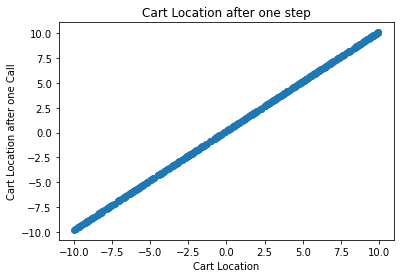

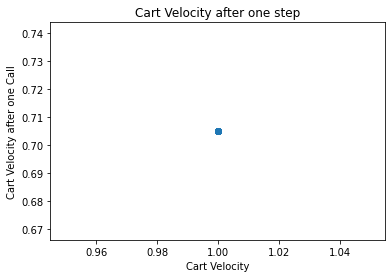

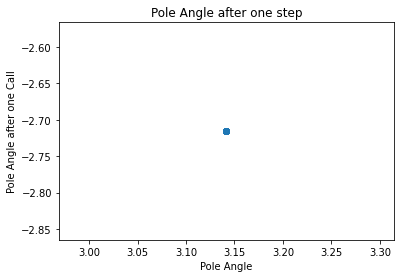

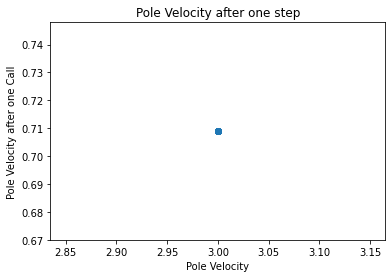

[[ 0.17659213 -0.29499998  0.42600213 -2.29102755]
 [ 0.17659213 -0.29499998  0.42600213 -2.29102755]
 [ 0.17659213 -0.29499998  0.42600213 -2.29102755]
 ...
 [ 0.17659213 -0.29499998  0.42600213 -2.29102755]
 [ 0.17659213 -0.29499998  0.42600213 -2.29102755]
 [ 0.17659213 -0.29499998  0.42600213 -2.29102755]]


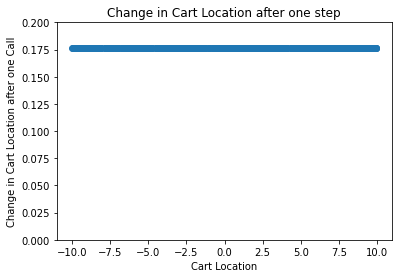

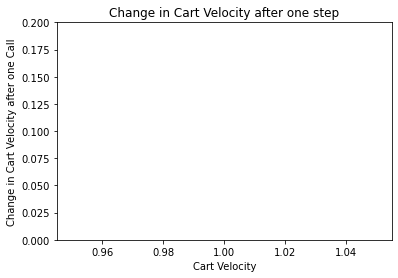

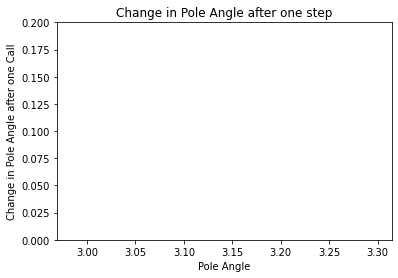

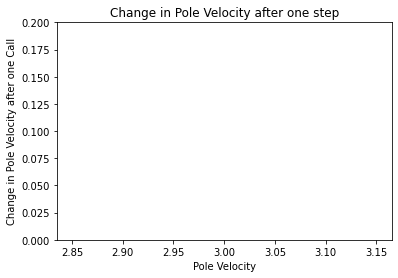

In [ ]:
n =500
state_before,state_after = np.zeros([n,4]),np.zeros([n,4])
#Single Scan
f = CartPole()
for i in range(n):
    f.reset()
    #vary starting state to scan
    state = [ np.random.uniform(-10,10),1,np.pi,3]
    f.setState(state)
    state_before[i] = f.getState()
    f.performAction()
    f.remap_angle()
    state_after[i]=f.getState()

print(state_before)
print(state_after)
t = np.arange(0,n*0.1,0.1)
labels=['Cart Location','Cart Velocity','Pole Angle','Pole Velocity']
for i in range(4):
    plt.scatter(state_before[:,i],state_after[:,i])
    plt.xlabel(labels[i])
    plt.ylabel(labels[i] +' after one Call')
    plt.title(labels[i] +' after one step')
    plt.show()
change_in_state,step= np.zeros([n,4]),np.zeros([n,4])
for i in range(n):
    step[i]=state_after[i]-state_before[i]
    f.setState(step[i])
    f.remap_angle()
    change_in_state[i]=f.getState()

print(change_in_state)
for i in range(4):
    plt.scatter(state_before[:,i],change_in_state[:,i])
    plt.xlabel(labels[i])
    plt.ylim(0,0.2)
    plt.ylabel('Change in '+labels[i] +' after one Call')
    plt.title('Change in '+labels[i] +' after one step')
    plt.show()
    

### Contour Plots

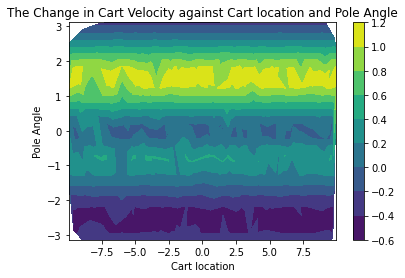

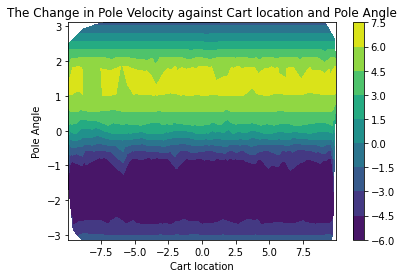

In [ ]:
#Contour Plots 
# Change initial conditions to vary which variables we are scanning
#Change in State against Cart Location and Pole Angle
x = CartPole()
m = 500
l = ['Cart location', 'Cart Velocity', 'Pole Angle', 'Pole Velocity']
r_state,step_state = np.zeros([m,4]),np.zeros([m,4])
for i in range(m):
    x.setState([np.random.uniform(-10,10),3,np.random.uniform(-np.pi,np.pi),3])
    r_state[i] = x.getState()
    #Perform update
    x.performAction()
    step_state[i] = x.getState()
    x.reset()

state_b, state_a, state_d = np.zeros([4,m]),np.zeros([4,m]),np.zeros([4,m])
for j in range(4):
    for i in range(m):
        state_b[j][i] = r_state[i][j]
        state_a[j][i] = step_state[i][j]
        state_d[j][i] = state_a[j][i] - state_b[j][i]
    
#Plot Contours    
plt.tricontourf(state_b[0], state_b[2],state_d[1],10)
plt.title('The Change in ' + l[1] + ' against ' + l[0] + ' and ' + l[2])
plt.xlabel(l[0])
plt.ylabel(l[2])
plt.colorbar()
plt.show()
plt.tricontourf(state_b[0], state_b[2],state_d[3],10)
plt.title('The Change in ' + l[3] + ' against ' + l[0] + ' and ' + l[2])
plt.xlabel(l[0])
plt.ylabel(l[2])
plt.colorbar()
plt.show()



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=180073fb-9c10-447b-b721-e7b1d25fe36a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>